<img src="https://user-images.githubusercontent.com/70644724/140609517-8fecc801-ce21-4d0c-8969-70201eb5ba63.png" style="width:80px; float: left; margin: 0 15px 15px 15px;"></img>
    
# Python

    
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)




## Practice assignment 8



> Data Visualization with Python (3.8.12) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set the colour palette
sns.reset_orig()
my_palette = sns.color_palette("colorblind")
plt.style.use('seaborn-colorblind')
sns.set_style("darkgrid")

In [3]:
#import data
titanic = pd.read_csv("titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Question 1: Various barplots

&nbsp;
&nbsp;

Bar plot of gender

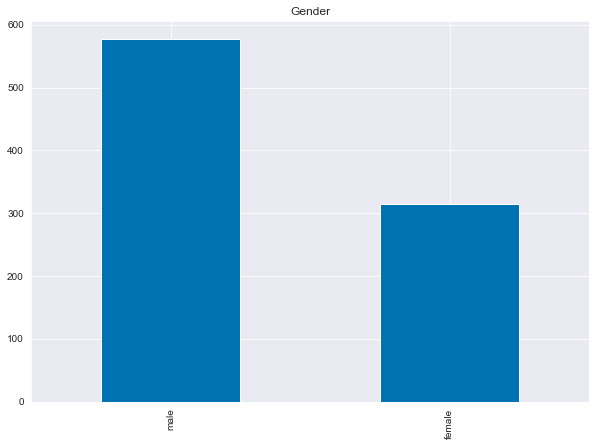

In [4]:
fig, ax = plt.subplots(figsize=(10, 7))
titanic['Sex'].value_counts().plot(kind='bar')
ax.set_title('Gender')
plt.show()

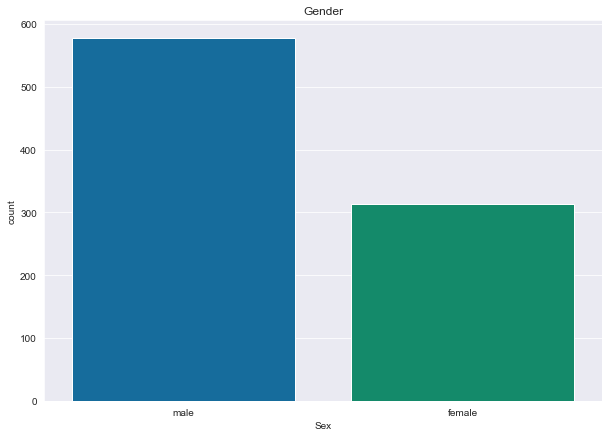

In [5]:
#sns

fig, ax = plt.subplots(figsize=(10, 7))

sns.countplot(data=titanic, x='Sex')
ax.set_title('Gender')

plt.show()

Bar plot of ticket class

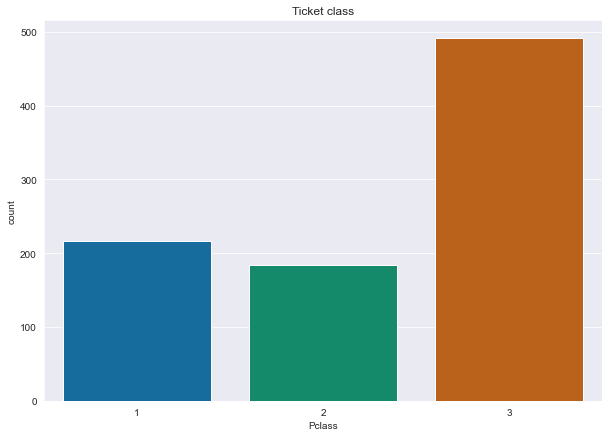

In [6]:
fig, ax = plt.subplots(figsize=(10, 7))

sns.countplot(data=titanic, x='Pclass')
ax.set_title('Ticket class')
plt.show()


Bar plot of Survival 

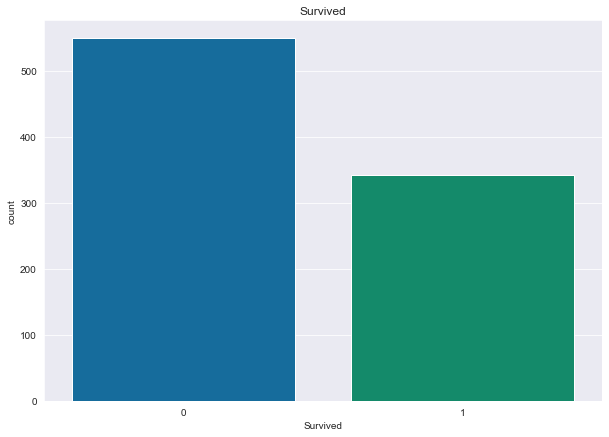

In [7]:
#sns.countplot(titanic.loc[['Survived']], color='skyblue')
fig, ax = plt.subplots(figsize=(10, 7))

sns.countplot(data=titanic, x='Survived')
ax.set_title('Survived')
plt.show()

### Question 2

&nbsp;
&nbsp;

Histogram of passenger age

C:\Users\e2u\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\e2u\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


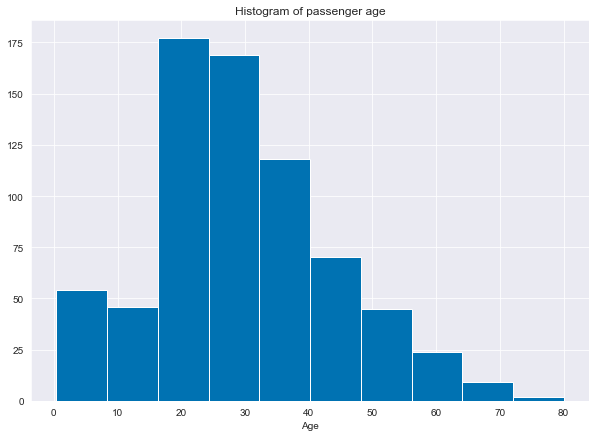

In [8]:
fig, ax = plt.subplots(figsize=(10, 7))

plt.hist(titanic['Age'], 10)
plt.xlabel('Age')
plt.title("Histogram of passenger age")
plt.show()

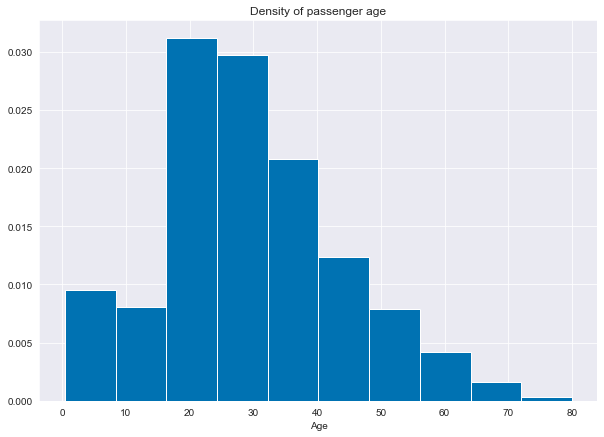

In [9]:
#density plot of passenger age 
fig, ax = plt.subplots(figsize=(10, 7))

plt.hist(titanic['Age'], 10, density =1)
plt.xlabel('Age')
plt.title("Density of passenger age")
plt.show()


box plot of age per ticket class

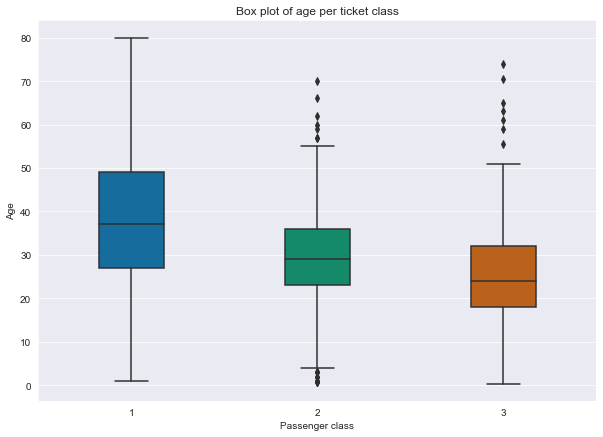

In [10]:
fig, ax = plt.subplots(figsize=(10, 7))

sns.boxplot(data = titanic, x = 'Pclass', y = 'Age', width = 0.35, 
boxprops = dict())
ax.set_xlabel("Passenger class")
ax.set_title("Box plot of age per ticket class")

plt.show()

box plot of age per survival

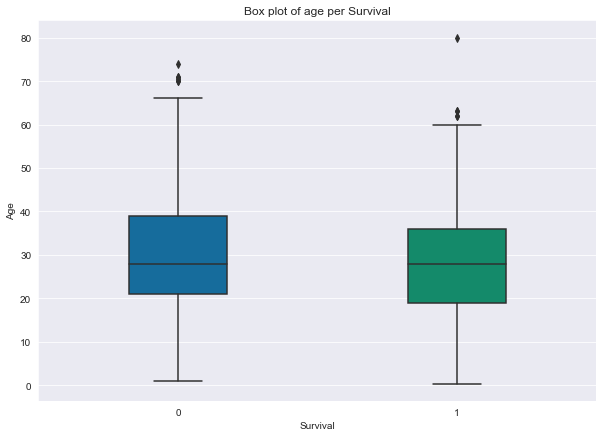

In [11]:
fig, ax = plt.subplots(figsize=(10, 7))

sns.boxplot(data = titanic, x = 'Survived', y = 'Age', width = 0.35, 
boxprops = dict())
ax.set_xlabel("Survival")
ax.set_title("Box plot of age per Survival")

plt.show()

Further data exploration: Bar plot of age per ticket class (NA's excluded)

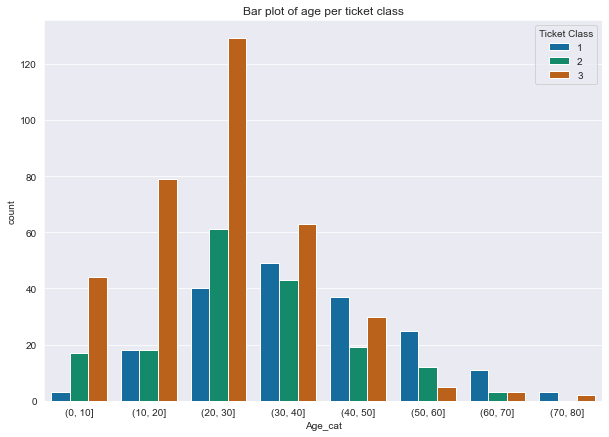

In [12]:
#create age groups
titanic["Age_cat"] = pd.cut(titanic["Age"], bins=[0,10,20,30,40,50,60,70,80])

#plot
f, ax = plt.subplots(figsize=(10, 7))

sns.countplot(titanic['Age_cat'], hue=titanic.Pclass)
ax.set_title("Bar plot of age per ticket class")
ax.legend(loc='upper right', title='Ticket Class')
plt.show()

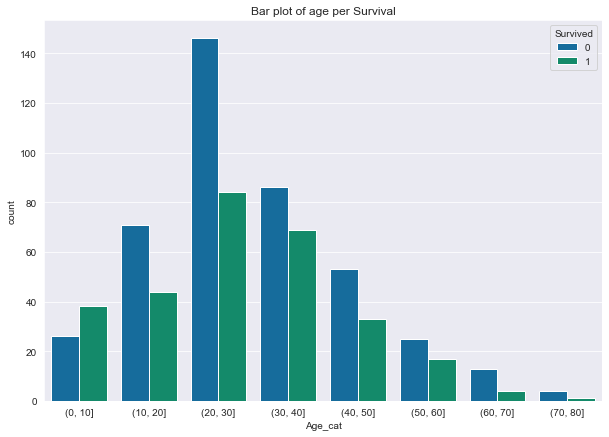

In [13]:
#Further data exploration: Bar plot of age per Survival (NA's excluded)

#create age groups
titanic["Age_cat"] = pd.cut(titanic["Age"], bins=[0,10,20,30,40,50,60,70,80])

#plot
f, ax = plt.subplots(figsize=(10, 7))

sns.countplot(titanic.Age_cat, hue=titanic.Survived)
ax.set_title("Bar plot of age per Survival")
plt.show()

### Question 3

&nbsp;
&nbsp;

Histogram for the travel fare and a table showing the number of people who did not pay


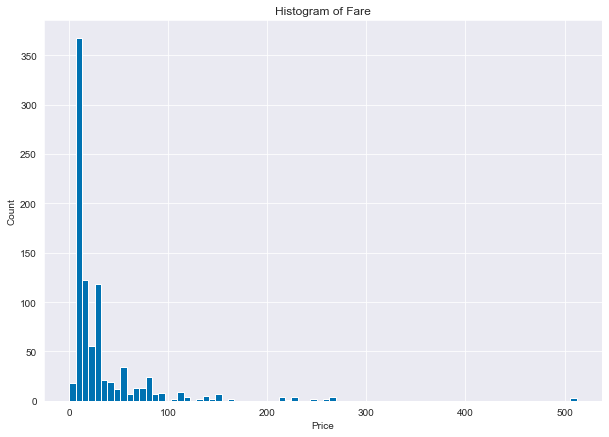

In [14]:
fig, ax = plt.subplots(figsize=(10, 7))

plt.hist(titanic['Fare'],bins=80)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title("Histogram of Fare")
plt.show()

Table

In [15]:
count_zero = titanic['Fare'].isin([0]).sum()
count_all = titanic['Fare'].count()
pay = count_all - count_zero
count_zero

15

In [16]:
from tabulate import tabulate

table = [['Total passengers', 'Paid', 'Did not pay'],[count_all,pay, count_zero]]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒════════════════════╤════════╤═══════════════╕
│   Total passengers │   Paid │   Did not pay │
╞════════════════════╪════════╪═══════════════╡
│                891 │    876 │            15 │
╘════════════════════╧════════╧═══════════════╛


### Question 4

&nbsp;
&nbsp;

Histogram to describe the family size per ticket class

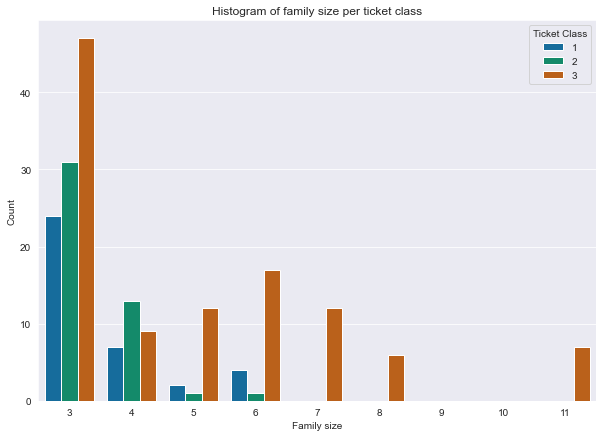

In [17]:
#create family size variable
titanic["Family_size"] = (titanic['SibSp']+titanic['Parch'])+1

#plot
f, ax = plt.subplots(figsize=(10, 7))

sns.countplot(titanic.Family_size,hue=titanic.Pclass, 
              order=titanic.Family_size.iloc[3:12].index)
ax.set_title("Histogram of family size per ticket class")
ax.legend(loc='upper right', title='Ticket Class')
plt.xlabel('Family size')
plt.ylabel('Count')
plt.show()

Histogram to describe the family size and survival rate

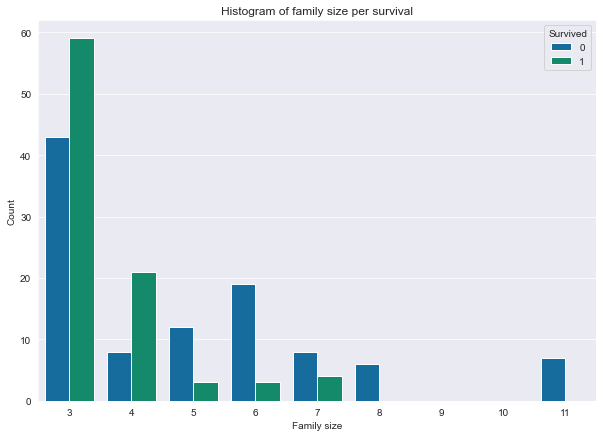

In [18]:
f, ax = plt.subplots(figsize=(10, 7))

sns.countplot(titanic.Family_size,hue=titanic.Survived, 
              order=titanic.Family_size.iloc[3:12].index)
ax.set_title("Histogram of family size per survival")
ax.legend(loc='upper right', title='Survived')
plt.xlabel('Family size')
plt.ylabel('Count')
plt.show()

### Question 5

&nbsp;
&nbsp;

Series of stacked bar charts to show the how survival differs for different gender and ticket class

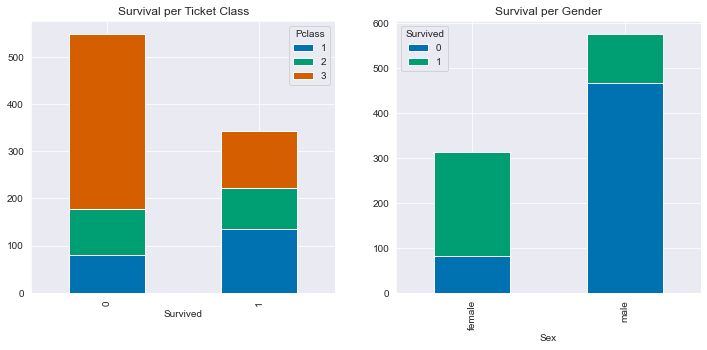

In [19]:
titanic_plot = titanic.groupby(['Pclass', 'Survived']).size().reset_index().pivot(columns='Pclass', index='Survived', values=0)
titanic_plot2 = titanic.groupby(['Survived', 'Sex']).size().reset_index().pivot(columns='Survived', index='Sex', values=0)

f, ax = plt.subplots(1,2,figsize=(12, 5))

titanic_plot.plot(kind='bar', stacked=True, ax=ax[0])
titanic_plot2.plot(kind='bar', stacked=True, ax=ax[1])
ax[0].set_title('Survival per Ticket Class')
ax[1].set_title('Survival per Gender')
plt.show()


### Question 6

&nbsp;
&nbsp;

Violin chart describing how survival relates to age and gender


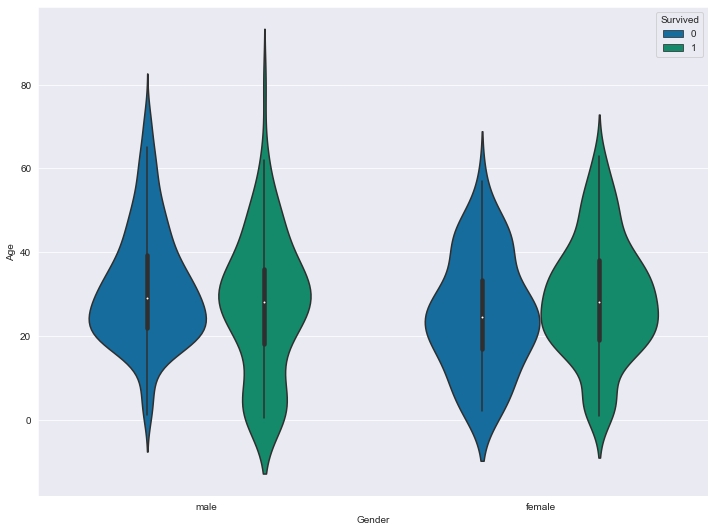

In [20]:
fig, ax = plt.subplots(figsize = (12,9))

sns.violinplot(data = titanic, x = 'Sex', y = 'Age', ax = ax, hue='Survived', width = 0.7)
ax.set_xlabel("Gender")

plt.show()

Violin chart describing the survival rate related to age and ticket class

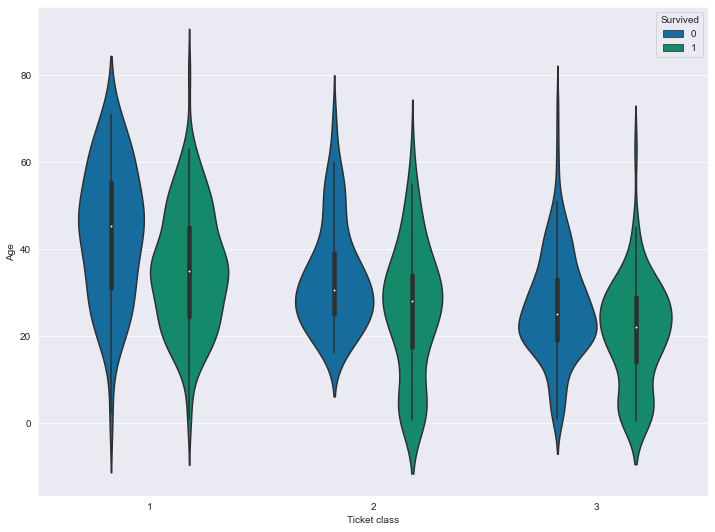

In [21]:
fig, ax = plt.subplots(figsize = (12,9))

sns.violinplot(data = titanic, x = 'Pclass', y = 'Age', ax = ax, hue='Survived', width = 0.7)
ax.set_xlabel("Ticket class")

plt.show()

- Generally passengers on 1st and 2nd class were more likely to survive, indicating that the security might have been less on 3rd. class
- Females were more likely than males to survive in each class. 
- Males on 3rd. class was unlikely to survive.
- Large family's were less likely to survive.
- Passengers of 40+ age are more likely to survive on 1st. class than 3rd.